# Lab 3: Minimizing Cost

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [1]:
# 시각화용 라이브러리
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

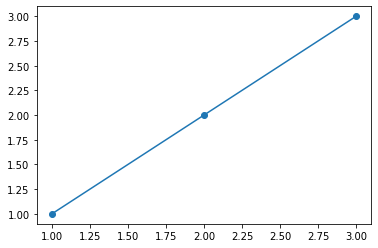

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

In [5]:
print(xs)

[1.         1.002002   1.004004   1.00600601 1.00800801 1.01001001
 1.01201201 1.01401401 1.01601602 1.01801802 1.02002002 1.02202202
 1.02402402 1.02602603 1.02802803 1.03003003 1.03203203 1.03403403
 1.03603604 1.03803804 1.04004004 1.04204204 1.04404404 1.04604605
 1.04804805 1.05005005 1.05205205 1.05405405 1.05605606 1.05805806
 1.06006006 1.06206206 1.06406406 1.06606607 1.06806807 1.07007007
 1.07207207 1.07407407 1.07607608 1.07807808 1.08008008 1.08208208
 1.08408408 1.08608609 1.08808809 1.09009009 1.09209209 1.09409409
 1.0960961  1.0980981  1.1001001  1.1021021  1.1041041  1.10610611
 1.10810811 1.11011011 1.11211211 1.11411411 1.11611612 1.11811812
 1.12012012 1.12212212 1.12412412 1.12612613 1.12812813 1.13013013
 1.13213213 1.13413413 1.13613614 1.13813814 1.14014014 1.14214214
 1.14414414 1.14614615 1.14814815 1.15015015 1.15215215 1.15415415
 1.15615616 1.15815816 1.16016016 1.16216216 1.16416416 1.16616617
 1.16816817 1.17017017 1.17217217 1.17417417 1.17617618 1.1781

## Cost by W

$$ H(x) = Wx $$

In [6]:
# -5 ~ 7 사이를 1000등분해서 w_l
# list <= 순차적으로 데이터를 담는 추상자료형

# w_list
W_l = np.linspace(-5, 7, 1000)
# cost list
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)
    cost_l.append(cost.item())

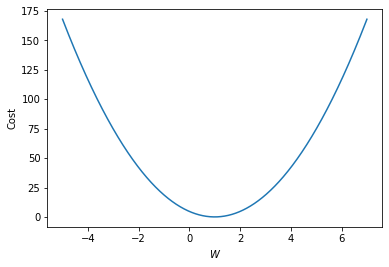

In [7]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand

In [8]:
W = 0

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

In [9]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


$$ W := W - \alpha \nabla W $$

In [10]:
lr = 0.1
# w = w - lr*gradient
W -= lr * gradient
print(W)

tensor(1.4000)


## Training

In [11]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/100 W: 0.000, Cost: 4.666667
Epoch    1/100 W: 1.400, Cost: 0.746666
Epoch    2/100 W: 0.840, Cost: 0.119467
Epoch    3/100 W: 1.064, Cost: 0.019115
Epoch    4/100 W: 0.974, Cost: 0.003058
Epoch    5/100 W: 1.010, Cost: 0.000489
Epoch    6/100 W: 0.996, Cost: 0.000078
Epoch    7/100 W: 1.002, Cost: 0.000013
Epoch    8/100 W: 0.999, Cost: 0.000002
Epoch    9/100 W: 1.000, Cost: 0.000000
Epoch   10/100 W: 1.000, Cost: 0.000000
Epoch   11/100 W: 1.000, Cost: 0.000000
Epoch   12/100 W: 1.000, Cost: 0.000000
Epoch   13/100 W: 1.000, Cost: 0.000000
Epoch   14/100 W: 1.000, Cost: 0.000000
Epoch   15/100 W: 1.000, Cost: 0.000000
Epoch   16/100 W: 1.000, Cost: 0.000000
Epoch   17/100 W: 1.000, Cost: 0.000000
Epoch   18/100 W: 1.000, Cost: 0.000000
Epoch   19/100 W: 1.000, Cost: 0.000000
Epoch   20/100 W: 1.000, Cost: 0.000000
Epoch   21/100 W: 1.000, Cost: 0.000000
Epoch   22/100 W: 1.000, Cost: 0.000000
Epoch   23/100 W: 1.000, Cost: 0.000000
Epoch   24/100 W: 1.000, Cost: 0.000000


## Training with `optim`

In [12]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
